In [1]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches

# Introduction to Anti-derivatives

#### Motivation
So far we have looked at how to take a given function, $f(x)$, and compute its derivative $\frac{d}{dx}f$. We discussed the interpretation of the derivative and looked at how we can use the derivative to gain information about the original function $f$. This form of study is known as ***differential calculus***. But what if we wanted to go the other way? Instead of starting with $f$ and computing $f'$, can we start with $f'$ and deduce $f$? This brings us into another field of calculus: ***integral calculus***.

#### Let's start with a concrete example
Suppose $f(0)=0$ and $f'(x) = x$. From that information alone, can we deduce $f(10)$? Begin by recalling the definition of a tangent line: 

$$f(x) \approx f(x_0) + f'(x_0)\cdot(x-x_0).$$

#### First Approximation
Let's use the linear approximation to approximate $f(10)$.

$$f(10) \approx f(0) + f'(0)\cdot(10-0) $$

Since we know $f(0)$ and $f'(0)$, this gives us an estimate for $f(10)$:

$$ f(10) \approx 0 + 0\cdot10 = 0 $$

#### Improving the Approximation 
How could we improve our approximation? In the above calculation we tried to jump directly from $f(0)$ to $f(10)$. What if we first used the intermediate step of computing $f(5)$? Again, we can write the linear approximations.

$$ f(5) \approx f(0) + f'(0)\cdot(5-0) \qquad\mathrm{and}\qquad f(10) \approx f(5) + f'(5)\cdot(10-5), $$

where the first statement shows us how to estimate $f(5)$ from $f(0)$ and the second statement shows us how to then estimate $f(10)$ from $f(5)$. Namely, 

\begin{align*}
f(5) &\approx f(0) + 5\cdot f'(0) 
&f(10) &\approx f(5) + 5\cdot f'(5) \\
&&     &\approx \underbrace{f(0) + 5\cdot f'(0)}_{\approx f(5)} +\, 5\cdot f'(5) \\
&&      &= f(0) + 5\cdot\left(f'(0) + f'(5)\right) \\
f(5)&\approx 0  & f(10) &\approx 25
\end{align*}

#### Further Improving the Approximation

What if we used ten jumps instead of two? That is, we go $0\to1$, $1\to2$, $2\to3$, ..., $9\to10$? Our linear approximation statements would look like:

\begin{align*}
f(1) &\approx f(0) + f'(0)\cdot(1-0)  &  f(2)  &\approx f(1) + f'(1)\cdot(2 -1) \\ 
f(3) &\approx f(2) + f'(2)\cdot(3-2)  &  f(4)  &\approx f(3) + f'(3)\cdot(4 -3) \\
f(5) &\approx f(4) + f'(4)\cdot(5-4)  &  f(6)  &\approx f(5) + f'(5)\cdot(6 -5) \\
f(7) &\approx f(6) + f'(6)\cdot(7-6)  &  f(8)  &\approx f(7) + f'(7)\cdot(8 -7) \\
f(9) &\approx f(8) + f'(8)\cdot(9-8)  &  f(10) &\approx f(9) + f'(9)\cdot(10-9) \\
\end{align*}

This leads to the following approximation for $f(10)$:

\begin{align*}
f(10) &\approx f(0) + 1\cdot \left\{f'(0) +f'(1) + f'(2) + f'(3) + f'(4) + f'(5) + f'(6) + f'(7) + f'(8) + f'(9)\right\} \\
&\approx 45
\end{align*}

#### Summary

So our approximations went from 

\begin{align*}
1\text{ jump}   &\implies& f(10) &\approx f(0) + 10\cdot f'(0) && =0\\
2\text{ jumps}  &\implies& f(10) &\approx f(0) + 5\cdot\left\{f'(0) + f'(5)\right\} && = 25\\
10\text{ jumps} &\implies& f(10) &\approx f(0) + 1\cdot \left\{f'(0) +f'(1) + f'(2) + f'(3) + f'(4)\right. \\
&& & \qquad\qquad\qquad   \left.+\, f'(5) + f'(6) + f'(7) + f'(8) + f'(9)\right\} && = 45
\end{align*}

The pattern for these looks something like:
$$
f(10) \approx \underbrace{f(0)}_{\text{Reference value}} + \underbrace{\frac{10-0}{\text{Number of points}}}_{\text{Bin width}}\cdot\underbrace{\left\{  \text{Sum of slopes at each point} \right\}}_{\text{Sum of derivatives}}
$$

### Going Forward

In order to make the approximation better, we need to increase the number of points used. Ideally, we would want to take the limit of using infinitely many points.

Going forward, we need to formalize the $\,\text{Sum of derivatives}$ term. That is, we want a concise way of writing it algebraically. Once we have that, we can look at taking the limit as $\,\text{Number of points}\to\infty$.

This brings us to the idea of ***Sigma notation***. 

However, before we lose ourselve in the algebra, let's look at some demonstrations of using this approach to deducing $f(x)$ from $f'(x)$.

## Demo \#1

Let's see what our approximations actually look like. Taking advantage of computers, we can also use approximations using more than just $10$ points.

$$ f(0) = 0; \qquad f'(x) = x $$

The first figure shows the different reconstructions of $f(x)$ that arise from using more and more points. The solid grey curve shows the exact solution. As the number of points increases, the reconstructed $f(x)$ curves approach the true curve.

This illustrates how we can start with just $f(0)$ and $f'(x)$ and deduce $f(x)$.

In [3]:
# Define f'(x) = x
def fp(x):
    return x

# Define f(x)
def f(x):
    return 0.5*x**2

# Define x0 and f(0)
x0 = 0
f0 = f(x0)

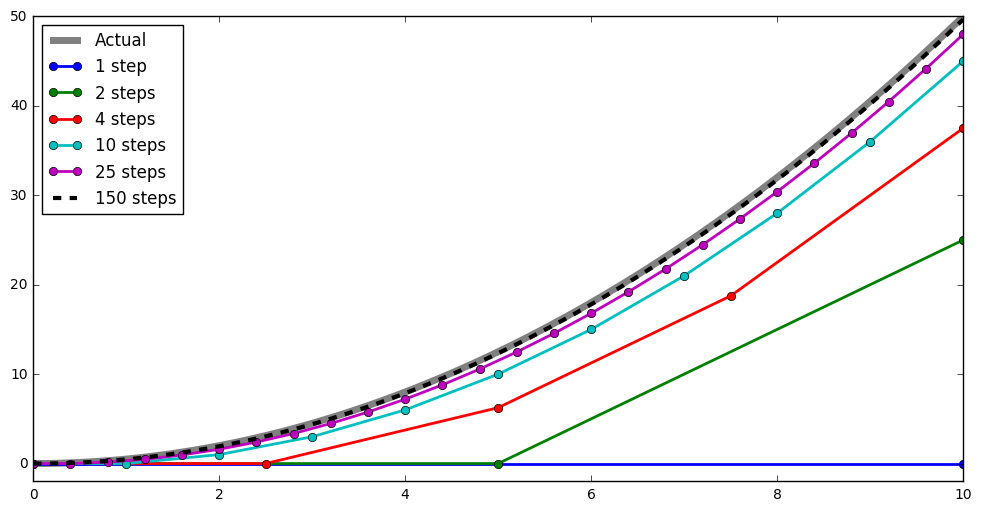

In [4]:
ns = [2,3,5,11,26,151]
xs = []
ys = []

for iin in range(len(ns)):
    n = ns[iin]
    x = np.linspace(0,10,n)
    y = np.zeros(x.shape)
    y[0] = f0
    
    for ii in range(1,n):
        y[ii] = y[ii-1] + (x[ii]-x[ii-1])*fp(x[ii-1])
        
    xs += [x]
    ys += [y]

plt.figure(figsize=(12,6))
plt.plot(xs[5],f(xs[5]), '-k', label='Actual',color=[0.5,0.5,0.5],linewidth=5)
plt.plot(xs[0],ys[0],'-o',label='1 step',linewidth=2)
plt.plot(xs[1],ys[1],'-o',label=r'{0:d} steps'.format(ns[1]-1),linewidth=2)
plt.plot(xs[2],ys[2],'-o',label=r'{0:d} steps'.format(ns[2]-1),linewidth=2)
plt.plot(xs[3],ys[3],'-o',label=r'{0:d} steps'.format(ns[3]-1),linewidth=2)
plt.plot(xs[4],ys[4],'-o',label=r'{0:d} steps'.format(ns[4]-1),linewidth=2)
plt.plot(xs[5],ys[5],'--k',label=r'{0:d} steps'.format(ns[5]-1),linewidth=3)
plt.ylim((-2,50))
plt.legend(loc='best')

## Area Interpretation

Recall that one of our first approximations looked like

$$
f(10) \approx f(0) + 5\cdot \left\{f'(0) + f'(5) \right\} 
$$

To tidy things up a bit, let's write $g=f'(x)$ and $c=f(0)$. Then we have 

\begin{align*}
f(10) &\approx c + 5\cdot \left\{g(0) + g(5) \right\} \\
&\approx c + \underbrace{5}_{\text{Width of interval}}\cdot \underbrace{g(0)}_{\text{'Height' of function}} + \underbrace{5}_{\text{Width of interval}}\cdot \underbrace{g(5)}_{\text{'Height' of function}} 
\end{align*}

In the second line, we've outlined how $5\cdot g(0)$ can be viewed as the area of a rectangle, where the width of the rectangle is $5$ and the height of the rectangle is $g(0)$. We can use a similar interpretation for $5\cdot g(5)$.

With this interpretation, we can view the antiderivative as being the ***area under the curve of $g$***, to within a constant.

In this case, to find $f(10)$, we would compute the area under $f'(x)$ between $x=0$ and $x=10$ and add it to the reference value of $f(0)$. 

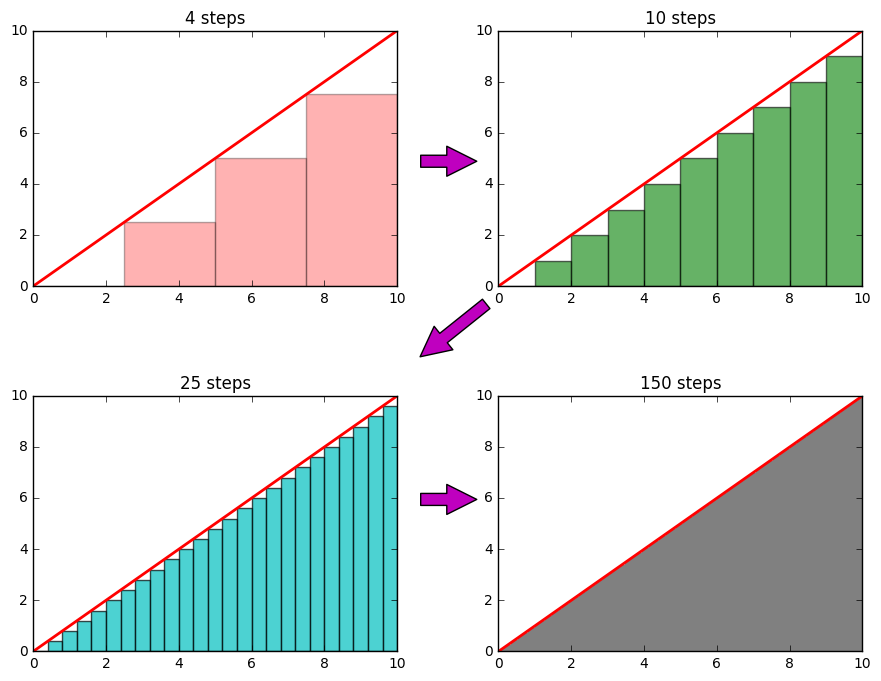

In [5]:
fig = plt.figure(figsize=(10,8))

ax4 = plt.subplot(2,2,4)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[5][:-1]
tmpy = fp(tmpx)
width = xs[5][1]-xs[5][0]
plt.bar(tmpx, tmpy, width, alpha=1.0,label=r'{0:d} steps'.format(ns[5]-1),
       color=[0.5,0.5,0.5], edgecolor = [0.5,0.5,0.5])
plt.title(r'{0:d} steps'.format(ns[5]-1))
plt.xlim((0,10))

ax3 = plt.subplot(2,2,3)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[4][:-1]
tmpy = fp(tmpx)
width = xs[4][1]-xs[4][0]
plt.bar(tmpx, tmpy, width, color='c', alpha=0.7,label=r'{0:d} steps'.format(ns[4]-1))
plt.title(r'{0:d} steps'.format(ns[4]-1))
plt.xlim((0,10))

ax2 = plt.subplot(2,2,2)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[3][:-1]
tmpy = fp(tmpx)
width = xs[3][1]-xs[3][0]
plt.bar(tmpx, tmpy, width, color='g', alpha=0.6,label=r'{0:d} steps'.format(ns[3]-1))
plt.title(r'{0:d} steps'.format(ns[3]-1))
plt.xlim((0,10))

ax1 = plt.subplot(2,2,1)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[2][:-1]
tmpy = fp(tmpx)
width = xs[2][1]-xs[2][0]
plt.bar(tmpx, tmpy, width, color='r', alpha=0.3,label=r'{0:d} steps'.format(ns[2]-1))
plt.title(r'{0:d} steps'.format(ns[2]-1))
plt.xlim((0,10))


# Create the arrow
ax0tr = ax1.transData 
ax1tr = ax2.transData 
ax2tr = ax3.transData
ax3tr = ax4.transData
figtr = fig.transFigure.inverted() 

ptA1 = figtr.transform(ax0tr.transform((10., 5.)))
ptA2 = figtr.transform(ax1tr.transform((-0.25, 5.)))

ptB1 = figtr.transform(ax1tr.transform((0., 0.)))
ptB2 = figtr.transform(ax2tr.transform((10., 10.)))

ptC1 = figtr.transform(ax2tr.transform((10., 5.)))
ptC2 = figtr.transform(ax3tr.transform((-0.25, 5.)))

arrow12 = matplotlib.patches.FancyArrowPatch(
    ptA1, ptA2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)
arrow23 = matplotlib.patches.FancyArrowPatch(
    ptB1, ptB2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)
arrow34 = matplotlib.patches.FancyArrowPatch(
    ptC1, ptC2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)

fig.patches.append(arrow12)
fig.patches.append(arrow23)
fig.patches.append(arrow34)

plt.tight_layout(pad=5)

## Demo \#2

Let's look at another anti-derivative example.

$$ f(0) = 1; \qquad f'(x) = -\sin(x) $$

We can apply the same process as above, but now for a more oscillatory shape. Initially, the reconstructions are very poor, the linear approximations have trouble with the oscillations. However, as the number of points increases, the reconstructions become closer and closer to the true value.

In [6]:
# Define f'(x) = x
def fp(x):
    return -np.sin(x)

# Define f(x)
def f(x):
    return np.cos(x)

# Define x0 and f(0)
x0 = 0
f0 = f(x0)

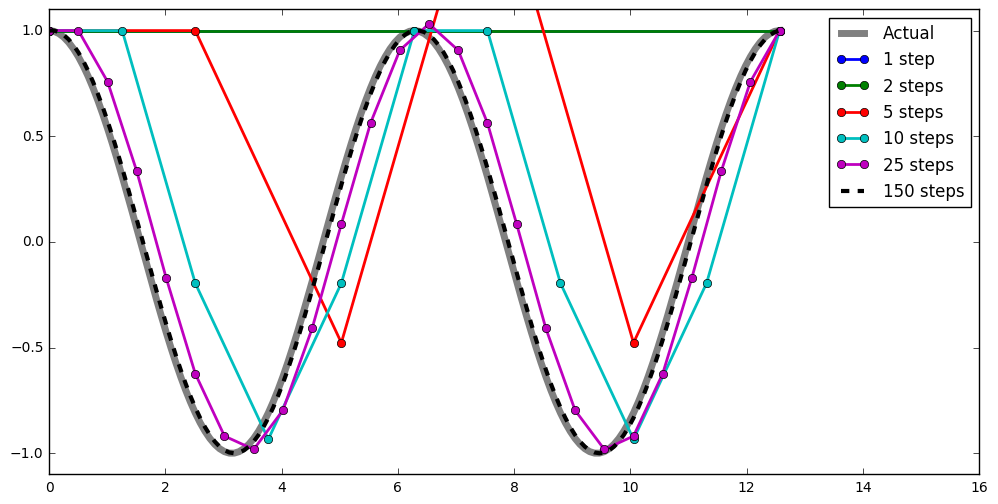

In [7]:
ns = [2,3,6,11,26,151]
xs = []
ys = []

for iin in range(len(ns)):
    n = ns[iin]
    x = np.linspace(0,4*np.pi,n)
    y = np.zeros(x.shape)
    y[0] = f0
    
    for ii in range(1,n):
        y[ii] = y[ii-1] + (x[ii]-x[ii-1])*fp(x[ii-1])
        
    xs += [x]
    ys += [y]

plt.figure(figsize=(12,6))
plt.plot(xs[5],f(xs[5]), '-k', label='Actual',color=[0.5,0.5,0.5],linewidth=5)
plt.plot(xs[0],ys[0],'-o',label='1 step', linewidth=2)
plt.plot(xs[1],ys[1],'-o',label=r'{0:d} steps'.format(ns[1]-1),linewidth=2)
plt.plot(xs[2],ys[2],'-o',label=r'{0:d} steps'.format(ns[2]-1),linewidth=2)
plt.plot(xs[3],ys[3],'-o',label=r'{0:d} steps'.format(ns[3]-1),linewidth=2)
plt.plot(xs[4],ys[4],'-o',label=r'{0:d} steps'.format(ns[4]-1),linewidth=2)
plt.plot(xs[5],ys[5],'--k',label=r'{0:d} steps'.format(ns[5]-1),linewidth=3)
plt.ylim((-1.1, 1.1))
plt.xlim((0,16))
plt.legend(loc='best')

### Area Interpretation

Once again, we can interpret our re-constructed $f(x)$ as being the area under the curve of $f'(x)$.

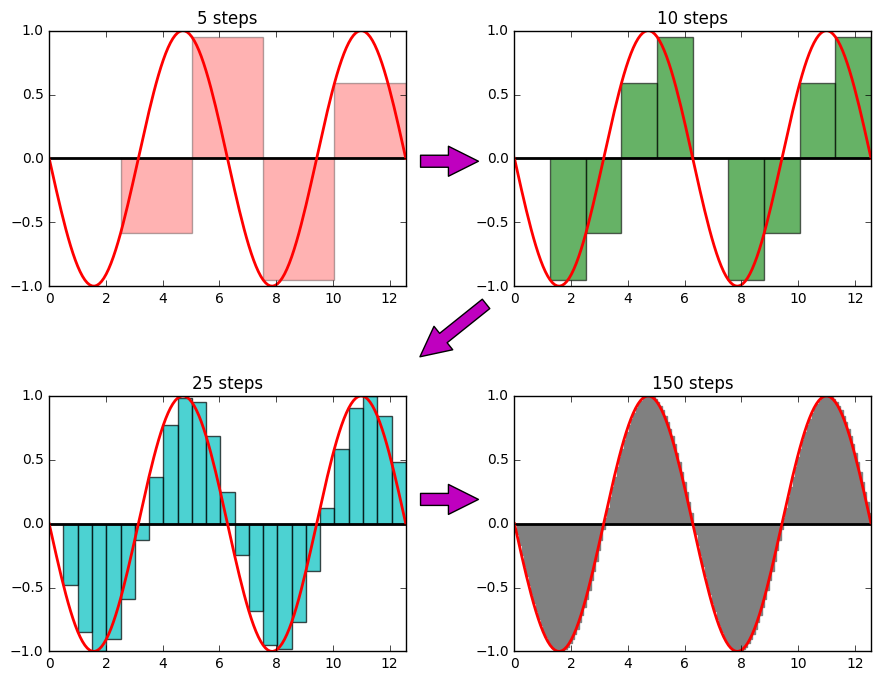

In [8]:
fig = plt.figure(figsize=(10,8))

ax4 = plt.subplot(2,2,4)
plt.plot(xs[5],0*xs[5],'k', linewidth=2)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[5][:-1]
tmpy = fp(tmpx)
width = xs[5][1]-xs[5][0]
plt.bar(tmpx, tmpy, width, alpha=1.0,label=r'{0:d} steps'.format(ns[5]-1),
       color=[0.5,0.5,0.5], edgecolor = [0.5,0.5,0.5])
plt.title(r'{0:d} steps'.format(ns[5]-1))
plt.xlim((0,4*np.pi))

ax3 = plt.subplot(2,2,3)
plt.plot(xs[5],0*xs[5],'k', linewidth=2)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[4][:-1]
tmpy = fp(tmpx)
width = xs[4][1]-xs[4][0]
plt.bar(tmpx, tmpy, width, color='c', alpha=0.7,label=r'{0:d} steps'.format(ns[4]-1))
plt.title(r'{0:d} steps'.format(ns[4]-1))
plt.xlim((0,4*np.pi))

ax2 = plt.subplot(2,2,2)
plt.plot(xs[5],0*xs[5],'k', linewidth=2)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[3][:-1]
tmpy = fp(tmpx)
width = xs[3][1]-xs[3][0]
plt.bar(tmpx, tmpy, width, color='g', alpha=0.6,label=r'{0:d} steps'.format(ns[3]-1))
plt.title(r'{0:d} steps'.format(ns[3]-1))
plt.xlim((0,4*np.pi))

ax1 = plt.subplot(2,2,1)
plt.plot(xs[5],0*xs[5],'k', linewidth=2)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[2][:-1]
tmpy = fp(tmpx)
width = xs[2][1]-xs[2][0]
plt.bar(tmpx, tmpy, width, color='r', alpha=0.3,label=r'{0:d} steps'.format(ns[2]-1))
plt.title(r'{0:d} steps'.format(ns[2]-1))
plt.xlim((0,4*np.pi))


# Create the arrow
ax0tr = ax1.transData 
ax1tr = ax2.transData 
ax2tr = ax3.transData
ax3tr = ax4.transData
figtr = fig.transFigure.inverted() 

ptA1 = figtr.transform(ax0tr.transform((4*np.pi, 0.)))
ptA2 = figtr.transform(ax1tr.transform((-0.25, 0.)))

ptB1 = figtr.transform(ax1tr.transform((0., -1.)))
ptB2 = figtr.transform(ax2tr.transform((4*np.pi, 1.)))

ptC1 = figtr.transform(ax2tr.transform((4*np.pi, 0.)))
ptC2 = figtr.transform(ax3tr.transform((-0.25, 0.)))

arrow12 = matplotlib.patches.FancyArrowPatch(
    ptA1, ptA2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)
arrow23 = matplotlib.patches.FancyArrowPatch(
    ptB1, ptB2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)
arrow34 = matplotlib.patches.FancyArrowPatch(
    ptC1, ptC2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)

fig.patches.append(arrow12)
fig.patches.append(arrow23)
fig.patches.append(arrow34)

plt.tight_layout(pad=5)